In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load features from CSV
data = pd.read_csv('../features_with_aug.csv')

# Standardize the features (CrosshairMovement, MotionDensity, and ScoreTakedown)
scaler = StandardScaler()
data[['CrosshairMovement', 'MotionDensity', 'ScoreTakedown']] = scaler.fit_transform(
    data[['CrosshairMovement', 'MotionDensity', 'ScoreTakedown']]
)

# Separate features (X) and labels (y)
X = data[['CrosshairMovement', 'MotionDensity', 'ScoreTakedown']]  # Features including ScoreTakedown
y = data['Label']  # The target variable (Label)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loaded and split into training and testing sets.")


Data loaded and split into training and testing sets.


Cross-validated accuracy scores: [0.81481481 0.82790698 0.83255814 0.78139535 0.79534884]
Mean accuracy score from cross-validation: 0.8104048234280793
Model Performance:
-------------------
Accuracy: 0.8185185185185185
Precision: 0.8291139240506329
Recall: 0.8562091503267973
F1-Score: 0.842443729903537
ROC-AUC: 0.8562091503267973

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       117
           1       0.83      0.86      0.84       153

    accuracy                           0.82       270
   macro avg       0.82      0.81      0.81       270
weighted avg       0.82      0.82      0.82       270



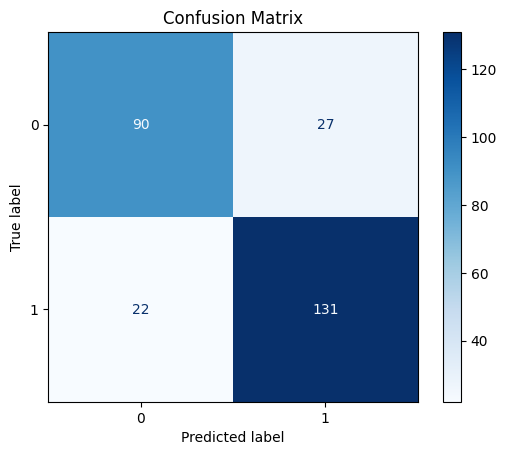

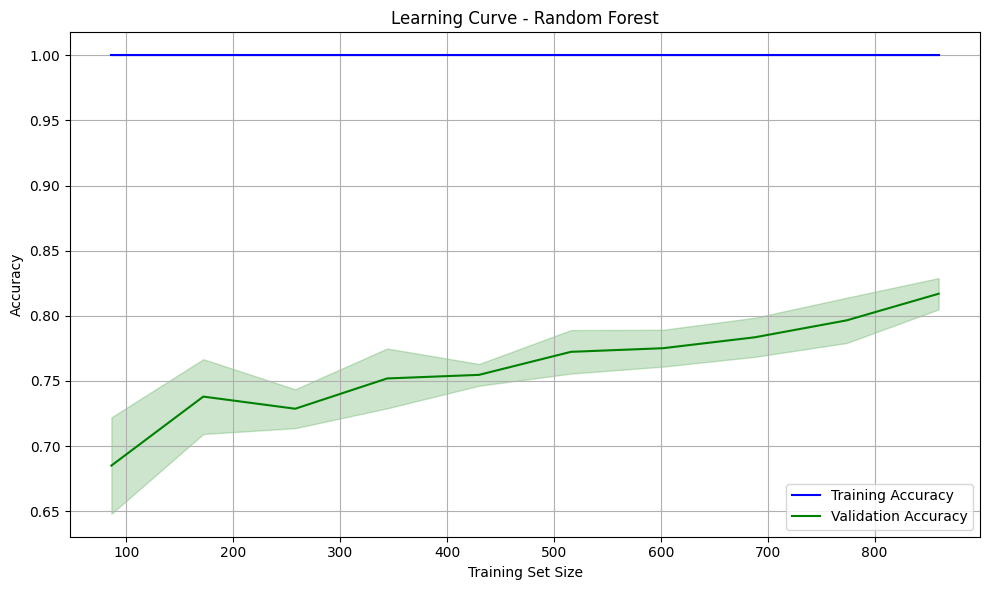

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded and split your data already:
# X_train, X_test, y_train, y_test

# Initialize the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Expand until all leaves are pure or min_samples_split is reached
    random_state=42    # Ensures reproducibility
)

# Cross-validation to assess model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy score from cross-validation: {cv_scores.mean()}")

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC

# Evaluate the model
print("Model Performance:")
print("-------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import joblib

# Save the trained model
joblib.dump(model, '../Models/trained_model.pkl')
print("Model saved as 'trained_model.pkl'")


Model saved as 'trained_model.pkl'


Epoch 1/200
14/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5267 - loss: 1.3804
Epoch 1: val_loss improved from inf to 1.28041, saving model to best_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5899 - loss: 1.3309 - val_accuracy: 0.7083 - val_loss: 1.2804 - learning_rate: 0.0010
Epoch 2/200
15/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7825 - loss: 1.1409 
Epoch 2: val_loss improved from 1.28041 to 1.27044, saving model to best_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7683 - loss: 1.1711 - val_accuracy: 0.6991 - val_loss: 1.2704 - learning_rate: 0.0010
Epoch 3/200
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 1.1950 
Epoch 3: val_loss improved from 1.27044 to 1.25860, saving model to best_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 1.1844 - val_accuracy: 0.6250 - val_loss: 1.2586 - learning_rate: 0.0010
Epoch 4/200
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7882 - lo

Epoch 23/200
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7625 - loss: 0.8162 
Epoch 23: val_loss improved from 0.85457 to 0.84998, saving model to best_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7648 - loss: 0.8109 - val_accuracy: 0.7083 - val_loss: 0.8500 - learning_rate: 0.0010
Epoch 24/200
18/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7667 - loss: 0.7943 
Epoch 24: val_loss improved from 0.84998 to 0.82955, saving model to best_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7673 - loss: 0.7939 - val_accuracy: 0.7037 - val_loss: 0.8296 - learning_rate: 0.0010
Epoch 25/200
15/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7532 - loss: 0.7771  
Epoch 25: val_loss did not improve from 0.82955
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.7791 - val_accuracy: 0.6991 - val_loss: 0.8414 - learning_rate: 0.0010
Epoch 26/200
20/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7738 - loss: 0.7658 
Epoch 26: val_

Epoch 68/200
19/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8151 - loss: 0.5262 
Epoch 68: val_loss did not improve from 0.63698
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8049 - loss: 0.5406 - val_accuracy: 0.7130 - val_loss: 0.6411 - learning_rate: 2.5000e-04
Epoch 69/200
15/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7645 - loss: 0.5931 
Epoch 69: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 69: val_loss did not improve from 0.63698
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.5883 - val_accuracy: 0.7176 - val_loss: 0.6459 - learning_rate: 2.5000e-04
Epoch 70/200
19/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.5496 
Epoch 70: val_loss did not improve from 0.63698
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7906 - loss: 0.5574 - val_accuracy: 0.7176 - val_loss: 0.6453 - learning_rate: 1.2500e-04
Epoch 70: early stopping
Restoring model weights from the end of the best epoch: 63.
9/9

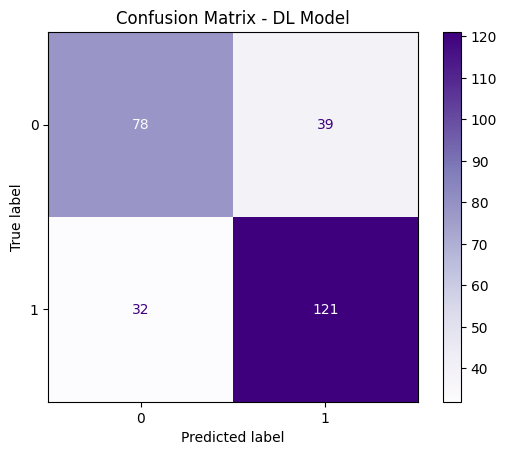

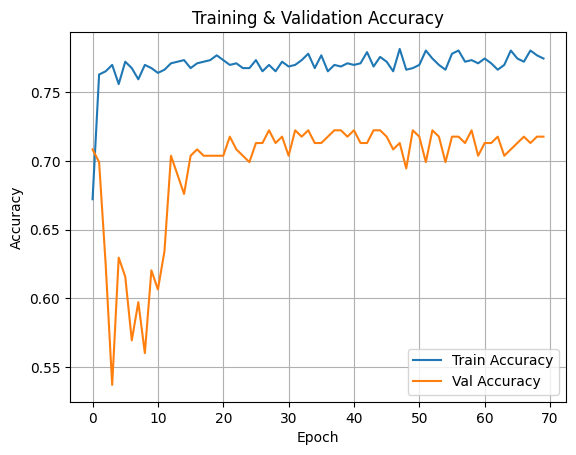

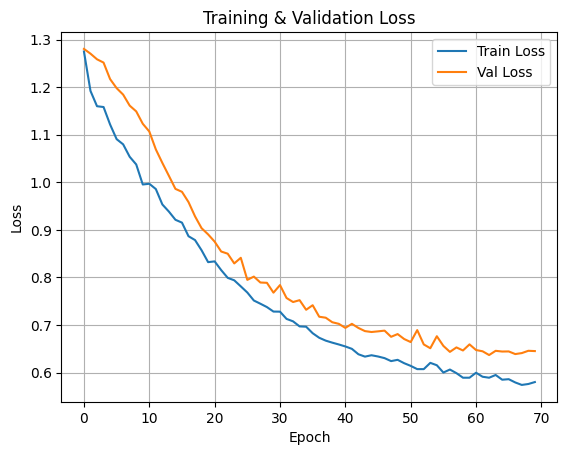

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load data
data = pd.read_csv('../features_with_aug.csv')

# Standardize features
scaler = StandardScaler()
data[['CrosshairMovement', 'MotionDensity']] = scaler.fit_transform(
    data[['CrosshairMovement', 'MotionDensity']]
)

# Features and target
X = data[['CrosshairMovement', 'MotionDensity', 'ScoreTakedown']]
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input(shape=(3,)),

    layers.Dense(512, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dropout(0.4),

    layers.Dense(256, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dropout(0.4),

    layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    layers.Dense(32, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", save_best_only=True, verbose=1)


# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler, checkpoint],
    verbose=1
)

# Evaluate the model
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

print("\nDL Model Performance:")
print("----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap="Purples")
plt.title("Confusion Matrix - DL Model")
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Save model (recommended format)
model.save("best_model.keras")  # or .h5 with save_format='h5'

# If you want to also save training history, etc.
import pickle

with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Optionally save scaler too
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [3]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 660.6 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 660.6 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 245.8 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 245.8 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 181.7 kB/s eta 0:00:00
